# Sprint 2: Data Preparation

### Loading data from CSV file

In [2]:
# import og nesecery libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os

In [4]:
#youssef_path = '/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv'

#df_sp500 = pd.read_csv('/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv')
df_interest_inflation = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/main/datasets/fed_interest_rate_inflation.csv')
# Read interest rates from 2017-now
df_interest_2017_to_now = pd.read_excel('/Users/lassekh/Documents/Datamatiker/4-semester/BI - Business Intelligence/bi-exam-project-stock/datasets/interest_rate_2017_now.xlsx')

# Reading from split csv files
# define arr with csv file names from directory
dir = '/Users/lassekh/Documents/Datamatiker/4-semester/BI - Business Intelligence/bi-exam-project-stock/datasets/not in use/sp500/'
csv_files = [f'{dir}part_{i}.csv' for i in range(1, 26)]

# load all csv-files into a data frame
dfs = [pd.read_csv(file) for file in csv_files]

# combine all DFs in one
df_sp500 = pd.concat(dfs, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Cleaning SP500 DF

In [5]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239723 entries, 0 to 4239722
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Adj Close  float64
 6   Volume     float64
 7   Ticker     object 
dtypes: float64(6), object(2)
memory usage: 258.8+ MB


In [6]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,1962-01-02,0.0,3.553512,3.448997,3.475125,0.570977,254509.0,MMM
1,1962-01-03,0.0,3.501254,3.416336,3.501254,0.575270,505190.0,MMM
2,1962-01-04,0.0,3.560044,3.501254,3.501254,0.575270,254509.0,MMM
3,1962-01-05,0.0,3.488190,3.396739,3.409804,0.560244,376979.0,MMM
4,1962-01-08,0.0,3.416336,3.370610,3.390207,0.557025,399942.0,MMM


In [5]:
df_sp500 = df_sp500.drop(columns="Ticker")

In [8]:
df_sp500.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.0,3.553512,3.448997,3.475125,0.570977,254509.0
1,1962-01-03,0.0,3.501254,3.416336,3.501254,0.575270,505190.0
2,1962-01-04,0.0,3.560044,3.501254,3.501254,0.575270,254509.0
3,1962-01-05,0.0,3.488190,3.396739,3.409804,0.560244,376979.0
4,1962-01-08,0.0,3.416336,3.370610,3.390207,0.557025,399942.0
...,...,...,...,...,...,...,...
95,1962-05-17,0.0,3.344482,3.279160,3.311821,0.545793,164570.0
96,1962-05-18,0.0,3.285692,3.213838,3.272628,0.539334,183706.0
97,1962-05-21,0.0,3.331417,3.253031,3.324885,0.547946,118643.0
98,1962-05-22,0.0,3.311821,3.220370,3.226902,0.531798,153088.0


In [9]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239723 entries, 0 to 4239722
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Adj Close  float64
 6   Volume     float64
dtypes: float64(6), object(1)
memory usage: 226.4+ MB


In [152]:
df_sp500.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Converting Date column to DateTime format
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])
df_sp500.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [46]:
df_sp500.tail(1000)

,Date,Open,High,Low,Close,Adj Close,Volume
4238723,2020-09-22,160.350006,162.479996,160.100006,161.509995,156.638733,1545000.0
4238724,2020-09-23,161.970001,162.669998,159.119995,159.330002,154.524475,1301200.0
4238725,2020-09-24,158.839996,159.509995,156.529999,157.979996,153.215195,1415600.0
4238726,2020-09-25,157.429993,161.460007,157.250000,160.839996,155.988892,1195900.0
4238727,2020-09-28,162.160004,164.339996,161.160004,161.320007,156.454453,2293800.0
...,...,...,...,...,...,...,...
4239718,2024-09-06,187.460007,190.440002,187.059998,189.229996,189.229996,2710100.0
4239719,2024-09-09,190.550003,193.610001,190.089996,191.729996,191.729996,2652700.0
4239720,2024-09-10,191.729996,192.770004,187.820007,191.360001,191.360001,2675600.0
4239721,2024-09-11,190.710007,191.149994,186.440002,189.990005,189.990005,1387900.0


In [50]:
print(df_sp500['Date'].duplicated().sum())
df_sp500 = df_sp500.drop_duplicates(subset='Date')
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15782 entries, 0 to 15781
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15782 non-null  datetime64[ns]
 1   Open       15782 non-null  float64       
 2   High       15782 non-null  float64       
 3   Low        15782 non-null  float64       
 4   Close      15782 non-null  float64       
 5   Adj Close  15782 non-null  float64       
 6   Volume     15782 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 986.4 KB


### Cleaning interest and inflation DF

In [90]:
df_interest_inflation['Effective Federal Funds Rate'].value_counts()

Effective Federal Funds Rate
0.09     13
0.16     11
5.25     10
3.00      8
0.12      8
         ..
11.34     1
12.01     1
12.92     1
11.93     1
0.66      1
Name: count, Length: 466, dtype: int64

In [11]:
df_interest_inflation.sample(15)

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
775,2007,8,1,5.250,NaN,NaN,5.02,NaN,4.6,2.1
512,1990,11,14,7.500,NaN,NaN,NaN,NaN,NaN,NaN
368,1984,3,1,9.375,NaN,NaN,9.91,NaN,7.8,5.0
58,1959,5,1,NaN,NaN,NaN,2.90,NaN,5.1,2.0
715,2003,12,1,1.000,NaN,NaN,0.98,NaN,5.7,1.1
695,2002,6,1,1.750,NaN,NaN,1.75,NaN,5.8,2.3
10,1955,5,1,NaN,NaN,NaN,1.43,NaN,4.3,NaN
625,1998,4,1,5.500,NaN,NaN,5.45,3.9,4.3,2.1
635,1998,11,17,4.750,NaN,NaN,NaN,NaN,NaN,NaN
443,1987,8,27,6.750,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# drop all columns we don't need
df_interest_inflation_dropped = df_interest_inflation.drop(columns=['Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target', 'Real GDP (Percent Change)', 'Unemployment Rate'])

df_interest_inflation_dropped.head()


,Year,Month,Day,Effective Federal Funds Rate,Inflation Rate
0,1954,7,1,0.80,NaN
1,1954,8,1,1.22,NaN
2,1954,9,1,1.06,NaN
3,1954,10,1,0.85,NaN
4,1954,11,1,0.83,NaN


In [13]:
df_interest_inflation_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          904 non-null    int64  
 1   Month                         904 non-null    int64  
 2   Day                           904 non-null    int64  
 3   Effective Federal Funds Rate  752 non-null    float64
 4   Inflation Rate                710 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 35.4 KB


In [13]:
# Combine the columns Year, Month, Day into one DateTime column
df_interest_inflation_dropped['Date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])

# Insert the new column at the beginning
df_interest_inflation_dropped.insert(0, 'Date', df_interest_inflation_dropped.pop('Date'))

# Drop Year, Month and Day
df_interest_inflation_dropped = df_interest_inflation_dropped.drop(columns=['Year', 'Month', 'Day'])

# Show me the result
df_interest_inflation_dropped.head()

,Date,Effective Federal Funds Rate,Inflation Rate
0,1954-07-01,0.80,NaN
1,1954-08-01,1.22,NaN
2,1954-09-01,1.06,NaN
3,1954-10-01,0.85,NaN
4,1954-11-01,0.83,NaN


### Interest rate from 2017 to now

In [130]:
df_interest_2017_to_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Effective Date            1937 non-null   object 
 1   Rate Type                 1937 non-null   object 
 2   Rate (%)                  1937 non-null   float64
 3   1st Percentile (%)        1937 non-null   float64
 4   25th Percentile (%)       1937 non-null   float64
 5   75th Percentile (%)       1937 non-null   float64
 6   99th Percentile (%)       1937 non-null   float64
 7   Volume ($Billions)        1937 non-null   int64  
 8   Target Rate From (%)      1937 non-null   float64
 9   Target Rate To (%)        1937 non-null   float64
 10  Intra Day - Low (%)       0 non-null      float64
 11  Intra Day - High (%)      0 non-null      float64
 12  Standard Deviation (%)    0 non-null      float64
 13  30-Day Average SOFR       0 non-null      float64
 14  90-Day A

In [129]:
df_interest_2017_to_now.head()

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%),Intra Day - Low (%),Intra Day - High (%),Standard Deviation (%),30-Day Average SOFR,90-Day Average SOFR,180-Day Average SOFR,SOFR Index,Revision Indicator (Y/N),Footnote ID
0,09/16/2024,EFFR,5.33,5.31,5.32,5.33,5.35,96,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09/13/2024,EFFR,5.33,5.31,5.32,5.33,5.35,105,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/12/2024,EFFR,5.33,5.31,5.32,5.33,5.35,111,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09/11/2024,EFFR,5.33,5.31,5.32,5.33,5.35,105,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/10/2024,EFFR,5.33,5.31,5.32,5.33,5.35,101,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Drop all rows i don't need - only need date and Rate(%)
df_interest_2017_to_now1 = df_interest_2017_to_now.filter(items=['Effective Date', 'Target Rate To (%)'])
df_interest_2017_to_now1.head()

,Effective Date,Target Rate To (%)
0,09/16/2024,5.5
1,09/13/2024,5.5
2,09/12/2024,5.5
3,09/11/2024,5.5
4,09/10/2024,5.5


In [15]:
# Convert the current column with date to a column with datetime data type and drop the 'Effective Date'
df_interest_2017_to_now1['Date'] = pd.to_datetime(df_interest_2017_to_now1['Effective Date'])
df_interest_2017_to_now1 = df_interest_2017_to_now1.drop(columns=['Effective Date'])
df_interest_2017_to_now1.head()

,Target Rate To (%),Date
0,5.5,2024-09-16
1,5.5,2024-09-13
2,5.5,2024-09-12
3,5.5,2024-09-11
4,5.5,2024-09-10


In [16]:
# Only keep rows where the date has actually changed
df_interest_2017_to_now1['RateChange'] = df_interest_2017_to_now1['Target Rate To (%)'].diff()
df_interest_2017_to_now1.head(10)

,Target Rate To (%),Date,RateChange
0,5.5,2024-09-16,NaN
1,5.5,2024-09-13,0.0
2,5.5,2024-09-12,0.0
3,5.5,2024-09-11,0.0
4,5.5,2024-09-10,0.0
5,5.5,2024-09-09,0.0
6,5.5,2024-09-06,0.0
7,5.5,2024-09-05,0.0
8,5.5,2024-09-04,0.0
9,5.5,2024-09-03,0.0


In [17]:
mode = df_interest_2017_to_now1['RateChange'].mode()[0]
df_interest_2017_to_now1['RateChange'].fillna(mode, inplace=True)
df_interest_2017_to_now1.head(10)

,Target Rate To (%),Date,RateChange
0,5.5,2024-09-16,0.0
1,5.5,2024-09-13,0.0
2,5.5,2024-09-12,0.0
3,5.5,2024-09-11,0.0
4,5.5,2024-09-10,0.0
5,5.5,2024-09-09,0.0
6,5.5,2024-09-06,0.0
7,5.5,2024-09-05,0.0
8,5.5,2024-09-04,0.0
9,5.5,2024-09-03,0.0


In [18]:
df_interest_2017_to_now1 = df_interest_2017_to_now1[df_interest_2017_to_now1['RateChange'] != 0]
df_interest_2017_to_now1 = df_interest_2017_to_now1.drop(columns='RateChange')
df_interest_2017_to_now1.head(10)

,Target Rate To (%),Date
287,5.25,2023-07-26
344,5.00,2023-05-03
374,4.75,2023-03-22
408,4.50,2023-02-01
440,4.00,2022-12-14
468,3.25,2022-11-02
497,2.50,2022-09-21
536,1.75,2022-07-27
564,1.00,2022-06-15
593,0.50,2022-05-04


## Combining data sets

In [87]:
# Combining into one df
df_merged = pd.merge(df_interest_inflation_dropped, df_sp500, on='Date', how='outer') # how can also be inner (default), left, right
df = pd.merge(df_interest_2017_to_now1, df_merged, on='Date', how='outer').sort_values(by='Date')
df.tail()

,Target Rate To (%),Date,Effective Federal Funds Rate,Inflation Rate,Open,High,Low,Close,Adj Close,Volume
16107,NaN,2024-09-06,NaN,NaN,130.500000,132.100006,128.020004,128.600006,128.600006,3562200.0
16108,NaN,2024-09-09,NaN,NaN,129.389999,130.979996,128.190002,128.460007,128.460007,3616300.0
16109,NaN,2024-09-10,NaN,NaN,128.850006,130.160004,128.460007,130.089996,130.089996,2732500.0
16110,NaN,2024-09-11,NaN,NaN,129.500000,130.380005,127.120003,130.229996,130.229996,3283800.0
16111,NaN,2024-09-12,NaN,NaN,130.300003,132.720001,130.100006,132.029999,132.029999,3978716.0


In [88]:
df.isna().sum()

Target Rate To (%)              16089
Date                                0
Effective Federal Funds Rate    15360
Inflation Rate                  15402
Open                              330
High                              330
Low                               330
Close                             330
Adj Close                         330
Volume                            330
dtype: int64

In [89]:
# Take the values form column 'Target Rate To (%)' and copy them to 'Effective Federal Funds Rate' if NaN
df['InterestRate'] = df['Effective Federal Funds Rate'].combine_first(df['Target Rate To (%)'])
df_clean = df.drop(columns=['Effective Federal Funds Rate', 'Target Rate To (%)'])
df_clean.head(20)

,Date,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,InterestRate
23,1954-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80
24,1954-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.22
25,1954-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06
26,1954-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85
27,1954-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83
28,1954-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.28
29,1955-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.39
30,1955-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.29
31,1955-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.35
32,1955-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43


In [90]:
# Fill interest rate value with last known, so there are no NaN
df_clean['InterestRate'] = df_clean['InterestRate'].ffill()
df_clean['Inflation Rate'] = df_clean['Inflation Rate'].ffill()
df_clean['Inflation Rate'] = df_clean['Inflation Rate'].bfill()

## Create more data
I want to add more columns with data about the difference in 'Close' price before and after the interest rate change. Maybe clean data first - no NaN?

In [91]:
df_clean.isna().sum()

Date                0
Inflation Rate      0
Open              330
High              330
Low               330
Close             330
Adj Close         330
Volume            330
InterestRate        0
dtype: int64

In [92]:
df_clean = df_clean.dropna()

In [93]:
def filter_df(df):
  filtered_df = df[(df['Date'] >= pd.Timestamp('1962-01-01')) & (df['Date'] <= pd.Timestamp('2024-09-12'))]
  return filtered_df

df_clean_filtered = filter_df(df_clean).reset_index(drop=True)

In [94]:
df_clean_filtered.head(20)

,Date,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,InterestRate
0,1962-01-02,1.3,0.0,3.553512,3.448997,3.475125,0.570977,254509.0,2.15
1,1962-01-03,1.3,0.0,3.501254,3.416336,3.501254,0.575270,505190.0,2.15
2,1962-01-04,1.3,0.0,3.560044,3.501254,3.501254,0.575270,254509.0,2.15
3,1962-01-05,1.3,0.0,3.488190,3.396739,3.409804,0.560244,376979.0,2.15
4,1962-01-08,1.3,0.0,3.416336,3.370610,3.390207,0.557025,399942.0,2.15
5,1962-01-09,1.3,0.0,3.416336,3.377143,3.390207,0.557025,376979.0,2.15
6,1962-01-10,1.3,0.0,3.383675,3.344482,3.351014,0.550585,304262.0,2.15
7,1962-01-11,1.3,0.0,3.370610,3.259563,3.337949,0.548438,269818.0,2.15
8,1962-01-12,1.3,0.0,3.383675,3.272628,3.272628,0.537706,692723.0,2.15
9,1962-01-15,1.3,0.0,3.311821,3.272628,3.305288,0.543072,252595.0,2.15


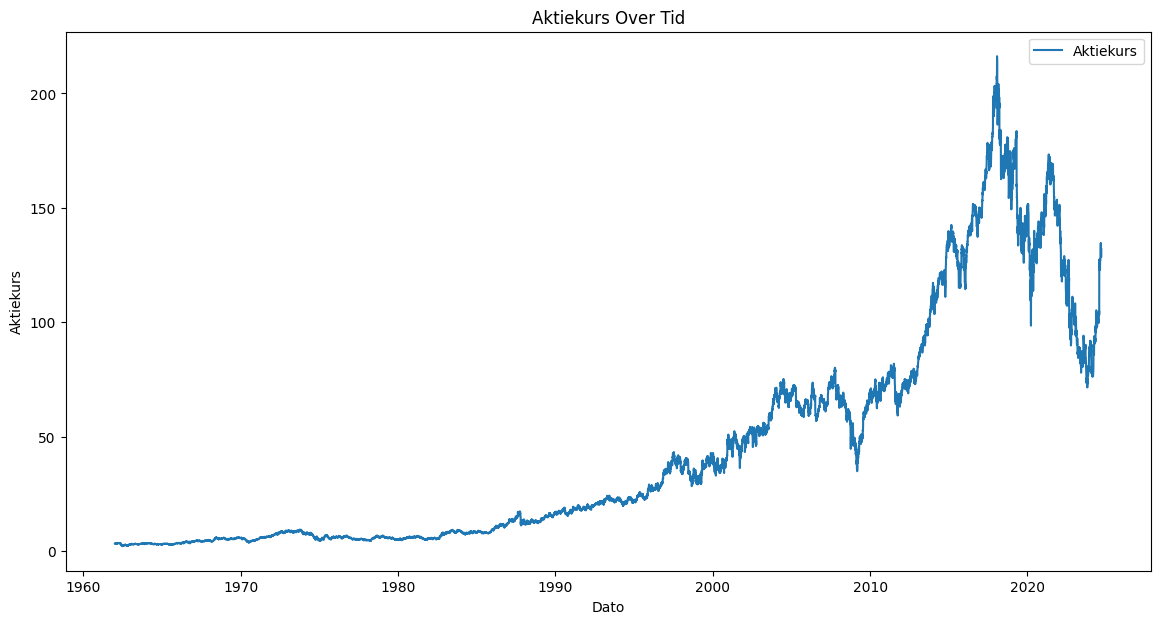

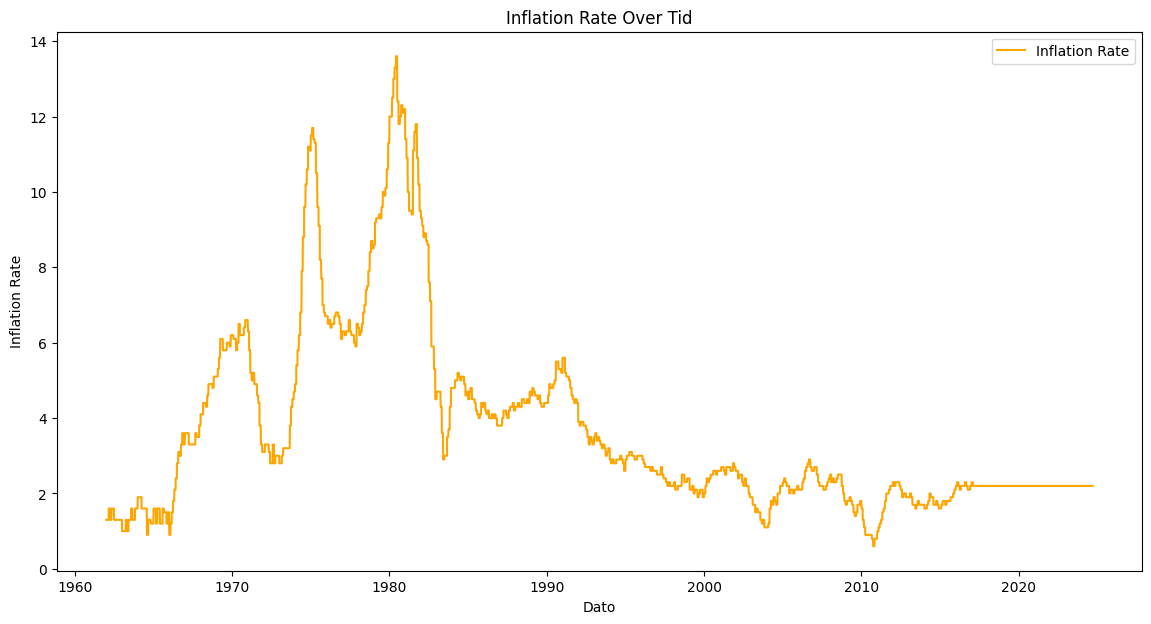

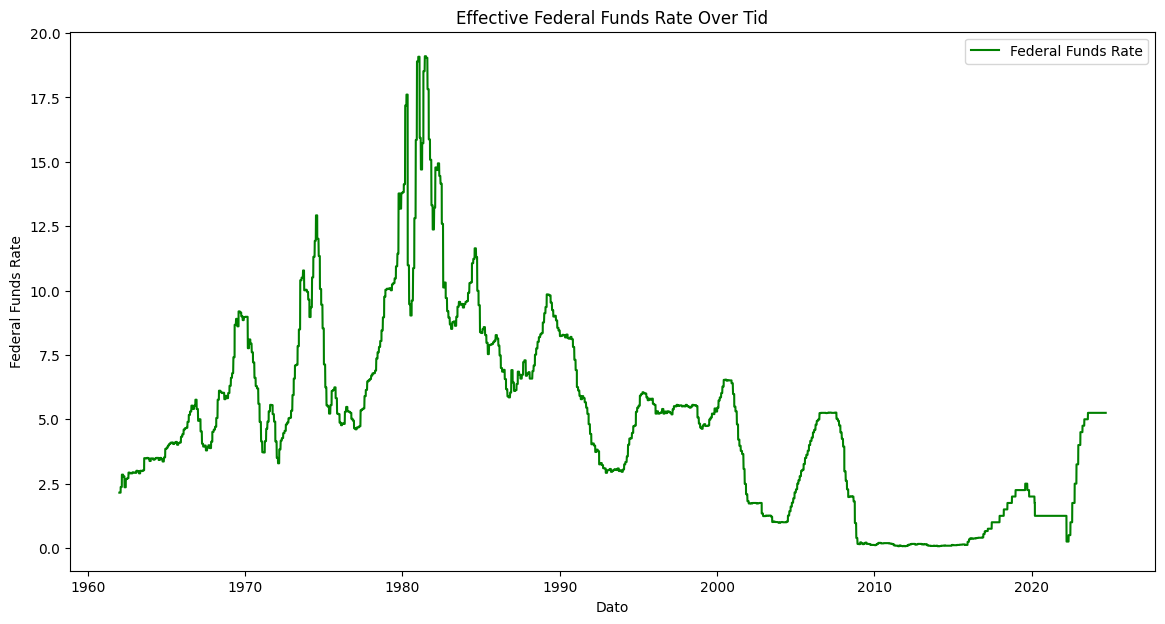

In [96]:
#Plot aktiekurser
plt.figure(figsize=(14, 7))
plt.plot(df_clean_filtered['Date'], df_clean_filtered['Close'], label='Aktiekurs')
plt.xlabel('Dato')
plt.ylabel('Aktiekurs')
plt.title('Aktiekurs Over Tid')
plt.legend()
plt.show()

#Plot inflation rate
plt.figure(figsize=(14, 7))
plt.plot(df_clean_filtered['Date'], df_clean_filtered['Inflation Rate'], label='Inflation Rate', color='orange')
plt.xlabel('Dato')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate Over Tid')
plt.legend()
plt.show()

#Plot effective federal funds rate
plt.figure(figsize=(14, 7))
plt.plot(df_clean_filtered['Date'], df_clean_filtered['InterestRate'], label='Federal Funds Rate', color='green')
plt.xlabel('Dato')
plt.ylabel('Federal Funds Rate')
plt.title('Effective Federal Funds Rate Over Tid')
plt.legend()
plt.show()

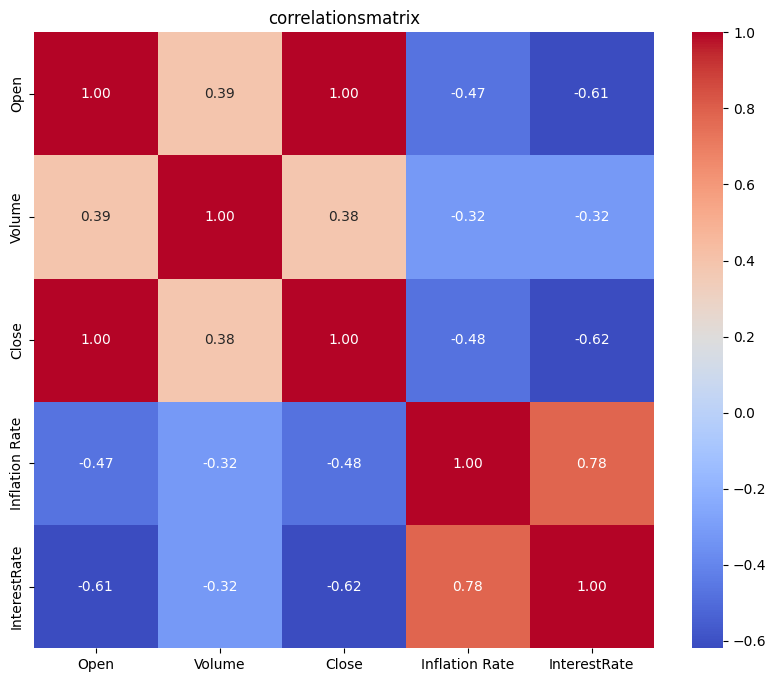

In [97]:
#Beregn korrelation
correlation_matrix = df_clean_filtered[['Open', 'Volume', 'Close', 'Inflation Rate', 'InterestRate']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()


## Compare interest rate change to X day index change

In [98]:
# Make copy of current cleaned and filtered data frame
df_diff = df_clean_filtered.copy()
# Calculate interest rate changes an save in new column
df_diff['InterestRateChange'] = df_diff['InterestRate'].diff()
# Flag days where there is a change in interest rate with 1
df_diff['InterestRateChangeFlag'] = np.where(df_diff['InterestRateChange'] != 0, 1, 0)

# Calculate the difference between the open and close value on the same day
df_diff['OPEN_CLOSE_CHANGE'] = (df_diff['Close'] - df_diff['Open']) / df_diff['Open']

# Calculate the change of the "Close" value X days from the interest rate change
# and place it the same number of days back on the potential interest change day
df_diff[f'1_DAYS_PLUS'] = df_diff['Close'].pct_change(periods=1).shift(-1)
df_diff[f'1_DAYS_PLUS'] = df_diff['Close'].pct_change(periods=1).shift(-1)
df_diff[f'2_DAYS_PLUS'] = df_diff['Close'].pct_change(periods=2).shift(-2)
df_diff[f'3_DAYS_PLUS'] = df_diff['Close'].pct_change(periods=3).shift(-3)
df_diff[f'4_DAYS_PLUS'] = df_diff['Close'].pct_change(periods=4).shift(-4)
df_diff[f'5_DAYS_PLUS'] = df_diff['Close'].pct_change(periods=5).shift(-5)
df_diff[f'10_DAYS_PLUS'] = df_diff['Close'].pct_change(periods=10).shift(-10)
df_diff[f'20_DAYS_PLUS'] = df_diff['Close'].pct_change(periods=20).shift(-20)

In [100]:
df_diff = df_diff[df_diff['InterestRateChangeFlag'] == 1].copy().dropna()
df_diff.tail()

,Date,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,InterestRate,InterestRateChange,InterestRateChangeFlag,OPEN_CLOSE_CHANGE,1_DAYS_PLUS,2_DAYS_PLUS,3_DAYS_PLUS,4_DAYS_PLUS,5_DAYS_PLUS,10_DAYS_PLUS,20_DAYS_PLUS
22,1962-02-01,1.3,0.0,3.573108,3.435932,3.553512,0.583857,319571.0,2.37,0.22,1,inf,0.011029,0.027574,0.029412,0.027574,0.025735,-0.025735,-0.027574
41,1962-03-01,1.6,0.0,3.520851,3.448997,3.475125,0.572706,139693.0,2.85,0.48,1,inf,-0.005639,-0.015037,-0.015037,-0.007519,-0.001880,0.052632,0.050752
63,1962-04-02,1.3,0.0,3.651495,3.625366,3.644962,0.600695,116730.0,2.78,-0.07,1,inf,-0.021505,-0.032258,-0.017921,-0.014337,-0.021505,-0.014337,-0.066308
83,1962-05-01,1.6,0.0,3.422868,3.292224,3.403271,0.560864,359757.0,2.36,-0.42,1,inf,0.028791,0.044146,0.036468,0.024952,0.021113,-0.005758,-0.113244
105,1962-06-01,1.6,0.0,2.946018,2.776181,2.776181,0.457519,694637.0,2.68,0.32,1,inf,-0.049412,-0.004706,-0.011765,-0.014118,-0.011765,-0.089412,-0.117647


In [101]:
df_diff.tail()

,Date,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,InterestRate,InterestRateChange,InterestRateChangeFlag,OPEN_CLOSE_CHANGE,1_DAYS_PLUS,2_DAYS_PLUS,3_DAYS_PLUS,4_DAYS_PLUS,5_DAYS_PLUS,10_DAYS_PLUS,20_DAYS_PLUS
15344,2022-12-14,2.2,105.769234,107.416389,104.381271,105.426422,96.596672,3702457.0,4.00,0.75,1,-0.003241,-0.029423,-0.034896,-0.031406,-0.041875,-0.020858,-0.043778,0.027123
15376,2023-02-01,2.2,95.777596,97.608696,95.025085,96.872910,88.759529,3708557.0,4.50,0.50,1,0.011436,0.038236,0.014069,0.005524,0.008976,-0.005265,-0.009235,-0.051441
15410,2023-03-22,2.2,87.224083,87.416389,84.866219,84.899666,78.819046,3355378.0,4.75,0.25,1,-0.026649,-0.005318,-0.003939,-0.000492,0.001970,0.016250,0.007386,0.031416
15439,2023-05-03,2.2,86.538460,87.458191,85.844482,85.978264,79.820396,2459096.0,5.00,0.25,1,-0.006473,-0.009628,0.005057,-0.004765,-0.019741,-0.018769,-0.025771,-0.083147
15496,2023-07-26,2.2,91.839462,94.540131,91.839462,94.180603,88.764336,6691620.0,5.25,0.25,1,0.025492,-0.012873,-0.006747,-0.010121,-0.018466,-0.033114,-0.079279,-0.115323


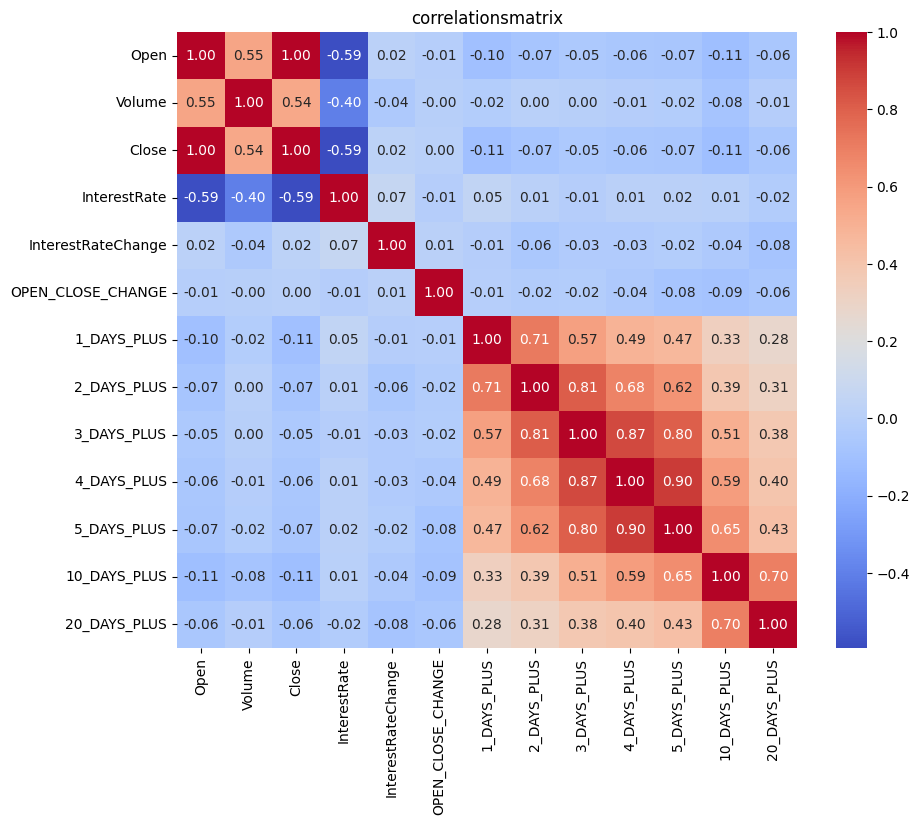

In [105]:
#Beregn korrelation
correlation_matrix = df_diff[['Open', 'Volume', 'Close', 'InterestRate', 'InterestRateChange', 'OPEN_CLOSE_CHANGE', '1_DAYS_PLUS', '2_DAYS_PLUS', '3_DAYS_PLUS', '4_DAYS_PLUS', '5_DAYS_PLUS', '10_DAYS_PLUS', '20_DAYS_PLUS']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

In [77]:
# Preparing data for comparing interest rate changes to
# from correlation import fe_interest_changes
#days = 10
#df_diff = fe_interest_changes(days, df_clean_filtered)
#df_interest_price_corr.head()

,Date,Effective Federal Funds Rate,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,InterestRateChange,SP500_10DAY_Change,InterestRateChangeFlag
115,1962-03-01,2.85,1.6,0.0,3.520851,3.448997,3.475125,0.572706,139693.0,0.48,-0.498669,1
140,1962-05-01,2.36,1.6,0.0,3.422868,3.292224,3.403271,0.560864,359757.0,-0.49,-0.500710,1
165,1962-06-01,2.68,1.6,0.0,2.946018,2.776181,2.776181,0.457519,694637.0,0.32,-0.424513,1
191,1962-08-01,2.93,1.3,0.0,2.639005,2.586747,2.599812,0.428453,177965.0,0.25,-0.374955,1
217,1962-10-01,2.90,1.3,0.0,2.554087,2.462636,2.462636,0.407351,225805.0,-0.03,-0.349655,1


In [68]:
# Perform Pearson correlation between interest rate changes and S&P 500 percentage change
corr, p_value = pearsonr(df_interest_price_corr['InterestRateChange'], df_interest_price_corr['SP500_10DAY_Change'])

# Print the results
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# A correlation coefficient closer to 1 or -1 indicates strong correlation, while near 0 indicates no correlation.
# A small p-value (typically < 0.05) suggests that the correlation is statistically significant.

Pearson correlation coefficient: -0.04521312479490028
P-value: 0.3462698223010737


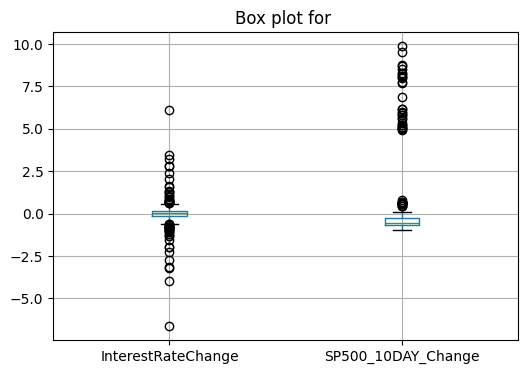

In [81]:
# See outliers
plt.figure(figsize=(6, 4))
df_interest_price_corr.boxplot(column=['InterestRateChange', 'SP500_10DAY_Change'])
plt.title(f'Box plot for ')
plt.show()

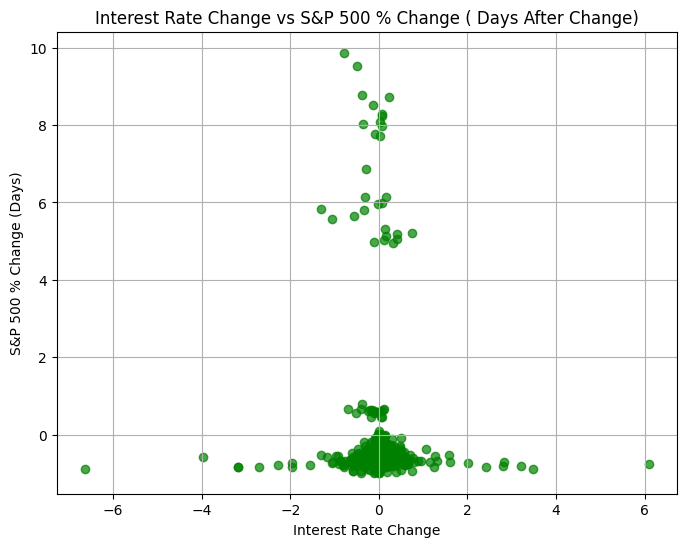

In [80]:
plt.figure(figsize=(8, 6))

plt.scatter(df_interest_price_corr['InterestRateChange'], df_interest_price_corr['SP500_10DAY_Change'], color='green', alpha=0.7)
plt.title(f'Interest Rate Change vs S&P 500 % Change ( Days After Change)')
plt.xlabel('Interest Rate Change')
plt.ylabel(f'S&P 500 % Change (Days)')
plt.grid(True)
plt.show()

In [1]:
#Beregn korrelation
correlation_matrix = df_interest_price_corr[['InterestRateChange', 'SP500_10DAY_Change', 'Close', 'Effective Federal Funds Rate']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

NameError: name 'df_interest_price_corr' is not defined